# Data Management Course Project
## Video Games Industry and Market Trend Analysis
### Member: Haokuan Wang 
### NetID: hw522
#### GitHub: https://github.com/HaokuanWang/game-sale-analysis/tree/main

The rapid growth of the gaming industry makes it essential for developers to understand market trends and player preferences. Data analysis provides insights into the relationships between game sales, player ratings, game genres, and platform choices. Is there a significant relationship between the game sales and players’ ratings? Does a highly rated game mean high sales? If you want to invest or develop a game, what factors should you consider? This project aims to leverage data analysis, visualization, modeling, and database management to analyze historical gaming data, offering valuable insights for future game development strategies.


### Create a database and table in MySQL and import csv file into the database.
the datasets used in this project are from Kaggle:
https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales;
https://www.kaggle.com/datasets/arnabchaki/popular-video-games-1980-2023


In [1]:
import pymysql
import csv
# Database configuration
DB_HOST = "localhost"
DB_USER = "root"
DB_PASSWORD = "Whk20030528!"

# Filepath to CSV
CSV_FILE = 'games.csv'
CSV_FILE2 = 'video_games_sales.csv'

# Connect to MySQL
try:
    connection = pymysql.connect(
        host=DB_HOST,
        user=DB_USER,
        password=DB_PASSWORD,
    )
    cursor = connection.cursor()

    # Create database if it doesn't exist
    cursor.execute("CREATE DATABASE IF NOT EXISTS gamedb;")
    cursor.execute("USE gamedb;")

    # Create table if it doesn't exist
    cursor.execute("""
    CREATE TABLE IF NOT EXISTS gameRateTable (
        Title VARCHAR(255),
        Rating FLOAT,
        TimesListed VARCHAR(255),
        NumberofReviews VARCHAR(255)
    );
    """)

    # Read the CSV file
    with open(CSV_FILE, mode='r', encoding='utf-8') as csvfile:
        diction_list = []

        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row

        for row in reader:
            # Ensure proper data types
            try:
                gameReview = {
                    "Title": row[1],
                    "Rating": float(row[4]) if row[4] else None,  
                    "Times Listed": row[5],
                    "Number of Reviews": row[6]
                }
                diction_list.append(gameReview)
            except (ValueError, IndexError) as e:
                print(f"Skipping invalid row: {row}. Error: {e}")
                continue

    # Insert data into MySQL table
    for item in diction_list:
        sql = """
        INSERT INTO gameRateTable (Title, Rating, TimesListed, NumberofReviews)
        VALUES (%s, %s, %s, %s);
        """
        val = (item['Title'], item['Rating'], item['Times Listed'], item['Number of Reviews'])
        cursor.execute(sql, val)

    connection.commit()
    print(f"Inserted {cursor.rowcount} rows into gameRateTable.")

    # # Retrieve and print data
    # cursor.execute("SELECT * FROM gameRateTable;")
    # myresult = cursor.fetchall()
    # for x in myresult:
    #     print(x)


    cursor.execute("""
    CREATE TABLE IF NOT EXISTS gameSalesTable (
        name VARCHAR(255),
        platform VARCHAR(255),
        year FLOAT,
        genre VARCHAR(255),
        publisher VARCHAR(255),
        na_sales FLOAT,
        eu_sales FLOAT,
        jp_sales FLOAT,
        other_sales FLOAT,
        global_sales FLOAT
    );
    """)

    # Read CSV file 2
    with open(CSV_FILE2, mode='r', encoding='utf-8') as csvfile:
        diction_list = []

        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row

        for row in reader:
            # Ensure proper data types
            try:
                gameReview = {
                    "name": row[1],
                    "platform": row[2],
                    "year": float(row[3]) if row[3] else None,
                    "genre": row[4],
                    "publisher": row[5],
                    "na_sales":float(row[6]) if row[6] else None,
                    "eu_sales": float(row[7]) if row[7] else None,
                    "jp_sales": float(row[8]) if row[8] else None,
                    "other_sales": float(row[9]) if row[9] else None,
                    "global_sales": float(row[10]) if row[10] else None,

                }
                diction_list.append(gameReview)
            except (ValueError, IndexError) as e:
                print(f"Skipping invalid row: {row}. Error: {e}")
                continue

    # Insert data into MySQL table
    for item in diction_list:
        sql = """
        INSERT INTO gameSalesTable (name, platform, year, genre, publisher, na_sales, eu_sales, jp_sales, other_sales, global_sales)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        val = (item['name'], item['platform'], item['year'], item['genre'], item['publisher'], item['na_sales'], item['eu_sales'], item['jp_sales'], item['other_sales'], item['global_sales'])
        cursor.execute(sql, val)

    connection.commit()
    print(f"Inserted {cursor.rowcount} rows into gameSalesTable.")

    # # Retrieve and print data
    # cursor.execute("SELECT * FROM gameSalesTable;")
    # myresult = cursor.fetchall()
    # for x in myresult:
    #     print(x)


finally:
    # Close the database connection
    if connection:
        connection.close()




Inserted 1 rows into gameRateTable.
Inserted 1 rows into gameSalesTable.


## Rate grouped by game platform
Video games are often released on many different platforms. Different platforms have different advantages and characteristics. Create a sorted list of games' average ratings on different platforms and observe whether any platform has significantly higher ratings.


C:\Users\phill\AppData\Local\Temp\ipykernel_24212\1950888237.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connection)


   platform    Rating
17      SAT  3.933333
19     SNES  3.875000
6        GC  3.742424
3        DS  3.717949
11       PS  3.706667
12      PS2  3.698701
23       XB  3.692593
4        GB  3.691667
2        DC  3.675000
1       3DS  3.658824
8       N64  3.642857
5       GBA  3.618750
16      PSV  3.575000
21     WiiU  3.572414
10       PC  3.565600
20      Wii  3.561905
13      PS3  3.545638
22     X360  3.533333
0      2600  3.500000
14      PS4  3.440984
15      PSP  3.435000
9       NES  3.426667
18      SCD  3.400000
24     XOne  3.353191
7       GEN  3.316667


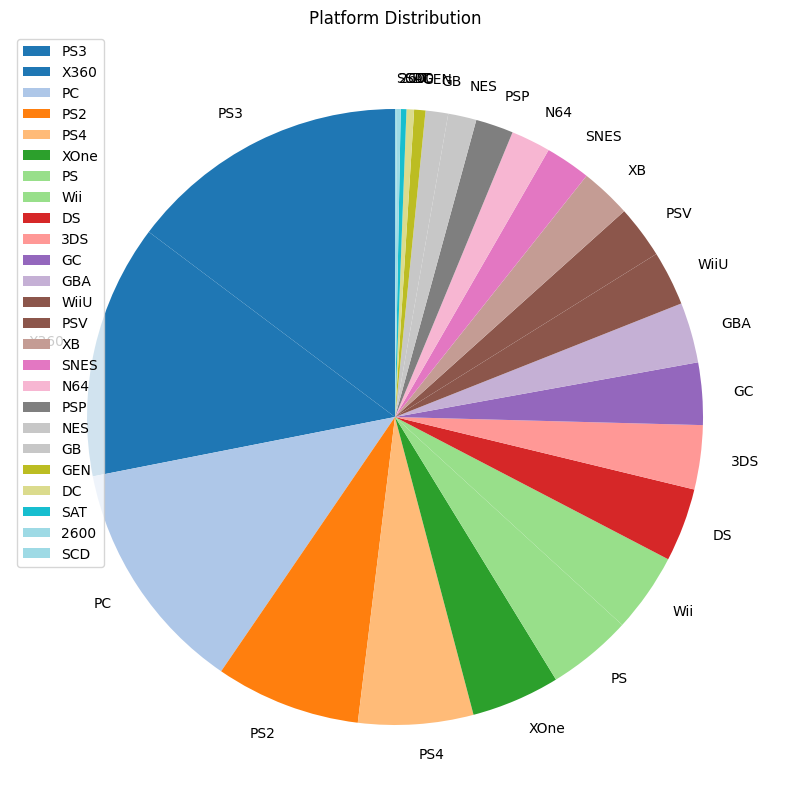

In [2]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt


connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Whk20030528!",
    database="gamedb"
)

sql = """
SELECT 
    gr.Title, 
    gr.Rating, 
    gs.platform
FROM 
    gameRateTable AS gr
LEFT JOIN 
    gameSalesTable AS gs
ON 
    gr.Title = gs.name

UNION

SELECT 
    gr.Title, 
    gr.Rating, 
    gs.platform
FROM 
    gameRateTable AS gr
RIGHT JOIN 
    gameSalesTable AS gs
ON 
    gr.Title = gs.name;
"""

df = pd.read_sql(sql, connection)
connection.close()  

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')  
df.dropna(subset=['Rating', 'platform'], inplace=True)  


# Calculate mean rating grouped by platform
mean_ratings = df.groupby('platform')['Rating'].mean().reset_index()
mean_ratings.sort_values(by='Rating', ascending=False, inplace=True)
# Display the results
print(mean_ratings)

platform_counts = df['platform'].value_counts()


plt.figure(figsize=(10, 10))
platform_counts.plot.pie( startangle=90, cmap="tab20", legend=True)

plt.title('Platform Distribution')
plt.ylabel('')  


plt.show()


After sorting the mean value of game's rates, the result shows that the highestt mean rating value platform is "SAT" (SEGA Saturn) which is a very old gameing platform, most of its games publish around 1995. Since the number of games from "SAT" platform is very small, players at that time don't have a lot of choices to play. This could be the reason why it has highest rating mean value. In general the mean rating values of all platforms are in the range of 3.3 to 4.0. There isn't a significant high rating values in a specific platform.

## Different Genres Trend Over Differenct Eras
Video games had already developed many decades. Count the number of games of different genre released in each years and draw the line graph. See the trend of different game genre.

C:\Users\phill\AppData\Local\Temp\ipykernel_24212\1316536234.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connection)


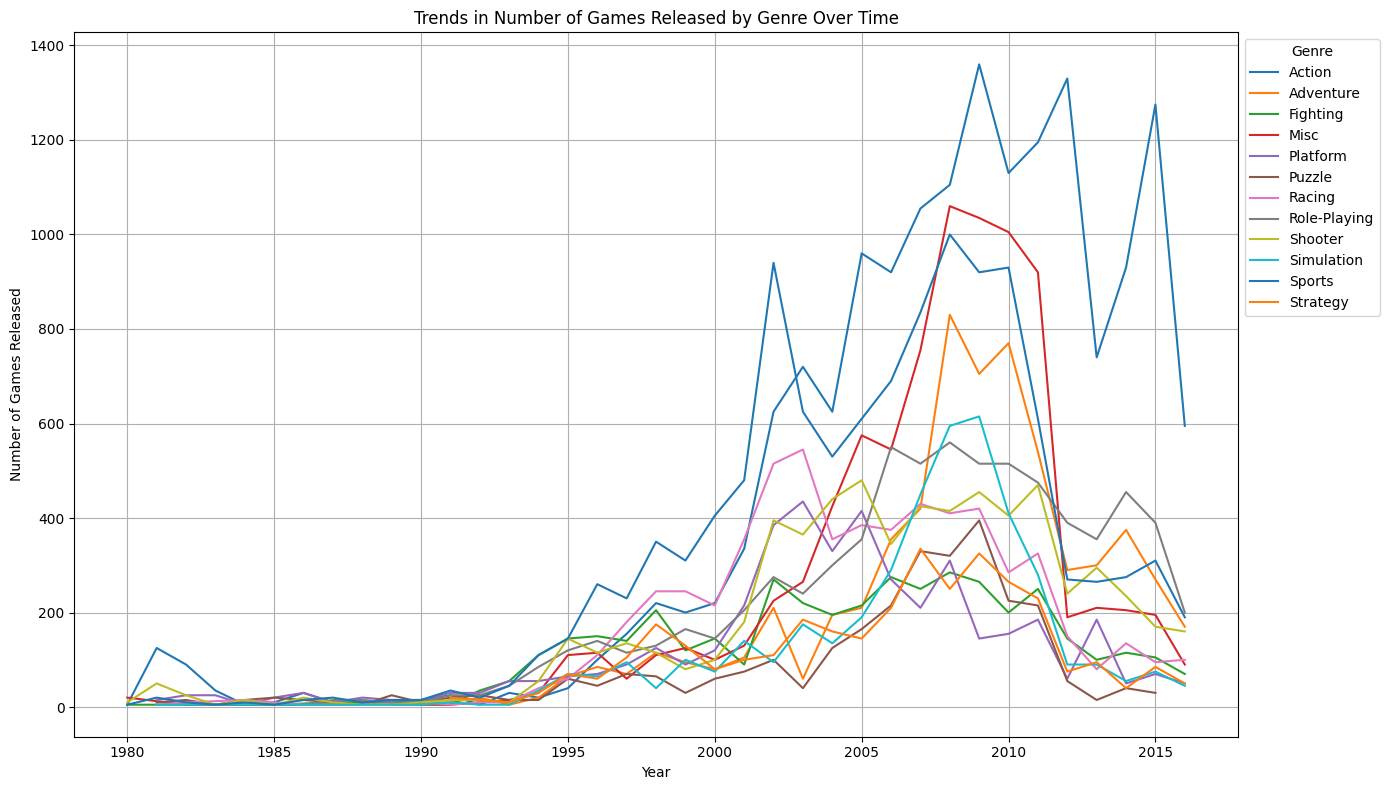

In [3]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

# Connect to MySQL
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Whk20030528!",
    database="gamedb"
)

# Query data for time-series analysis
sql = """
SELECT 
    gs.genre, 
    gs.year
FROM 
    gameSalesTable AS gs
WHERE 
    gs.year IS NOT NULL
ORDER BY 
    gs.year;
"""

# Load data into DataFrame
df = pd.read_sql(sql, connection)
connection.close()

# Ensure year is integer and group by genre and year
df['year'] = df['year'].astype(int)
df = df[df['year'] <= 2016]
df_grouped = df.groupby(['genre', 'year']).size().reset_index(name='count')

# Visualization: Trends by Genre Over Time
plt.figure(figsize=(14, 8))
genres = df_grouped['genre'].unique()
for genre in genres:
    genre_data = df_grouped[df_grouped['genre'] == genre]
    plt.plot(genre_data['year'], genre_data['count'], label=genre)

plt.title('Trends in Number of Games Released by Genre Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.legend(title="Genre", loc="upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()
plt.show()




The number of Sports games and Action games released increased steadily in the early 2000s, peaking around 2005–2010. Sports games often rely on annual releases (e.g., FIFA, Madden). By 2010, more and more people starts playing video games, these games dominated the gaming market, leaving little room for new entrants. Cause of the improved graphics, AI, and open-world design, it makes Action games much more attractive, enabling immersive experiences. In conclusion, if a game developer want to make game, choosing other genre such as Platform gmaes or Puzzle games can have less competition with other game developers.

## Regression Method on Ratings and Global Sales


C:\Users\phill\AppData\Local\Temp\ipykernel_24212\2786972921.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, connection)


Correlation between Rating and Global Sales: 0.07


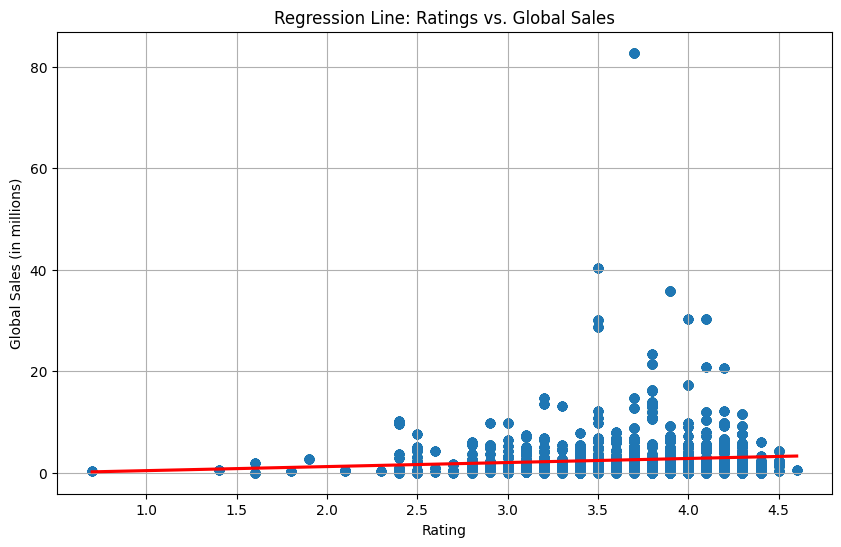

In [4]:

import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


connection = pymysql.connect(
    host="localhost",
    user="root",
    password="Whk20030528!",
    database="gamedb"
)

sql = """
SELECT 
    gr.Rating, 
    gs.global_sales
FROM 
    gameRateTable AS gr
INNER JOIN 
    gameSalesTable AS gs
ON 
    gr.Title = gs.name
WHERE 
    gr.Rating IS NOT NULL AND gs.global_sales IS NOT NULL;
"""


df = pd.read_sql(sql, connection)
connection.close()

df = df.dropna() 
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna()

correlation = df['Rating'].corr(df['global_sales'])
print(f"Correlation between Rating and Global Sales: {correlation:.2f}")


X = df[['Rating']]  
y = df['global_sales'] 

# testing linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='global_sales', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Regression Line: Ratings vs. Global Sales')
plt.xlabel('Rating')
plt.ylabel('Global Sales (in millions)')
plt.grid()
plt.show()

According to my original prediction, there will be a clear positive relationship between game ratings and sales. Higher rates means the sales will be higher. However, based on the result, the correlation value between Rating and Global Sales is 0.07, which is pretty close to 0. Correlation close to 0 means that there isn't a clear relation ship between ratings and salse. On the graph, there will be more outliers that have high global sales on the domain of rating between 3.5 to 4.5. One reason is there are more data in the range of rating from 2.5 to 4.5. Some excellent games become popular, which makes players buy more copies of the same game and attracts more people who don’t usually play games to buy this game. 